# Plot
Convenience class for data visualization.

In [1]:
%autosave 0
%load_ext autoreload
%autoreload 2

from pandas import read_csv, to_datetime
from tools import *
from plot import Plot

plot = Plot('bmh', figsize=(8,4))

Autosave disabled


## load example data

In [2]:
data = read_csv(DATADIR / 'examples/energy.csv')
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data = (
    data.loc[lambda df: df['year'].ge(2000)]
    .assign(year = to_datetime(data['year'], format='%Y'))
    .assign(hydro = data['conv._hydro'] + data['ps_hydro'])
    .drop(columns = 'total conv._hydro ps_hydro'.split())
    .rename(columns = {'natural_gas': 'gas', 'net_imports': 'imports'})
    .set_index('year').sort_index()
    .sort_index(axis=1)
)
data = data[data.sum().nlargest(5).index]
afew(data)

[17 rows x 5 columns]
           dtype  nulls
gas      float64      0
nuclear    int64      0
hydro    float64      0
imports  float64      0
coal     float64      0


,gas,nuclear,hydro,imports,coal
year,,,,,
2012-01-01,59462.0,40775,25303.0,26180.0,4551.0
2013-01-01,54354.0,44756,26397.0,25694.0,4697.0
2014-01-01,54380.0,43041,26823.0,22103.0,4325.0
2015-01-01,56923.0,44620,26704.0,22273.0,2046.0
2016-01-01,56793.0,41638,27150.0,26117.0,1493.0


## area

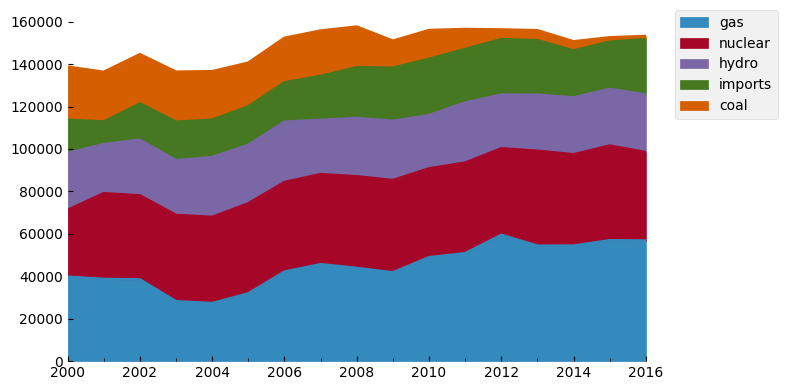

In [3]:
plot.area(data)

## bar, barh

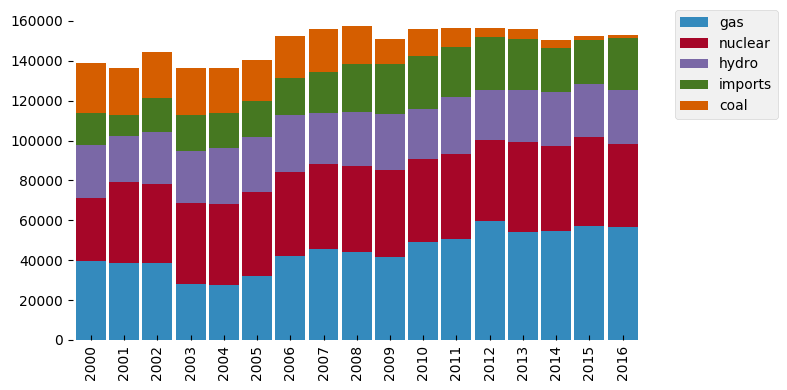

In [4]:
plot.bar(data.set_index(data.index.year))

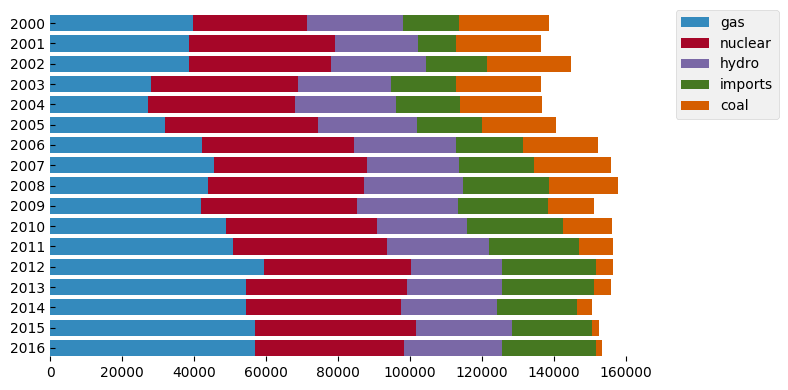

In [5]:
plot.barh(data.set_index(data.index.year))

## box, boxh

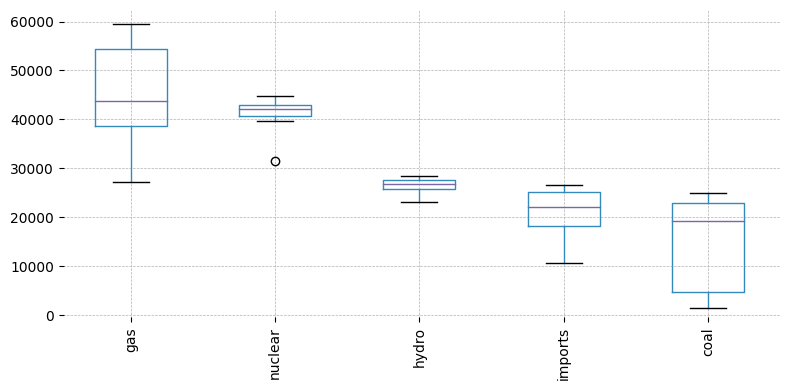

In [6]:
plot.box(data)

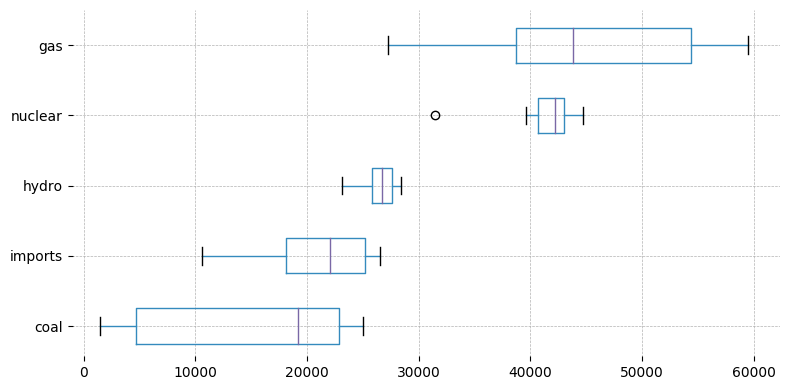

In [7]:
plot.boxh(data)

## density

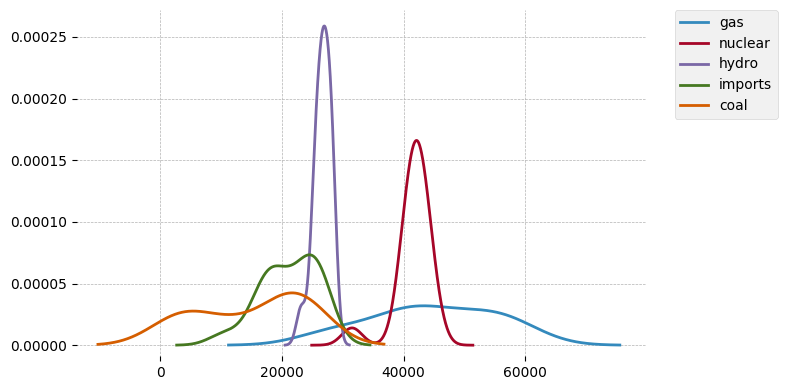

In [8]:
plot.density(data)

## heat

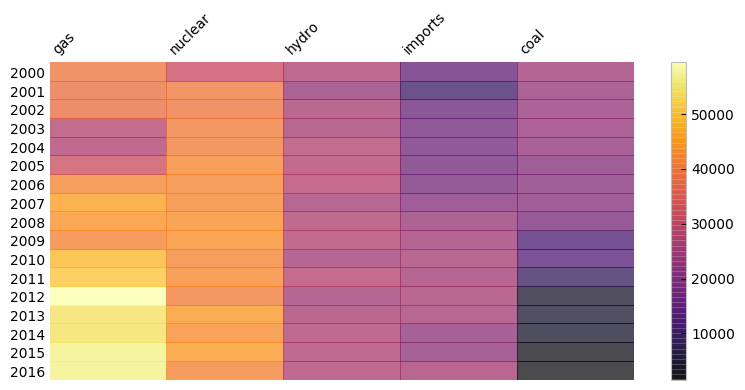

In [9]:
plot.heat(data.set_index(data.index.year), colorbar=True)

## hist

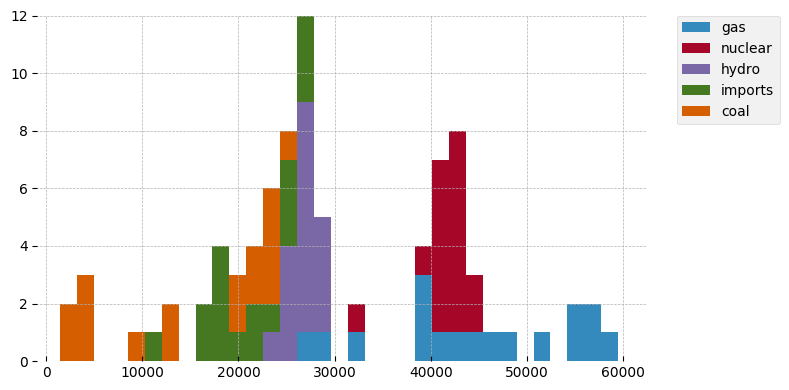

In [10]:
plot.hist(data)

## line

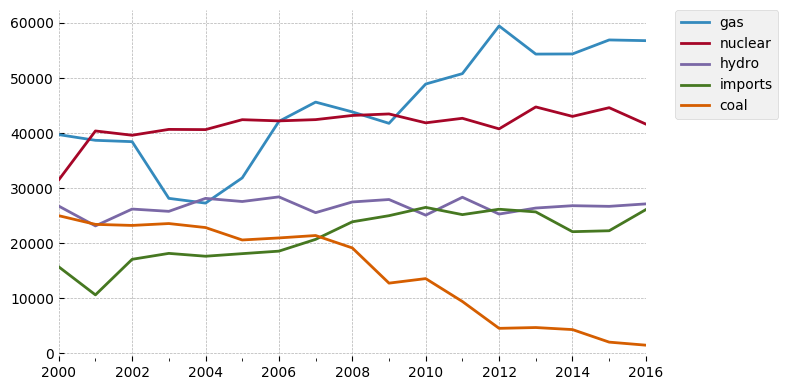

In [11]:
plot.line(data)

## scatter

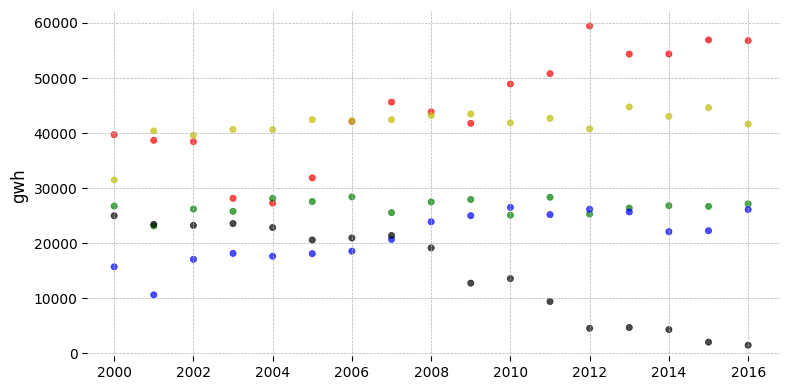

In [12]:
points = data.stack().reset_index()
points.columns = 'year source gwh'.split()
points['year'] = points['year'].dt.year
points['color'] = points['source'].map(dict(zip(data.columns, 'rygbk')))
points = points['year gwh color'.split()]

plot.scatter(points, ylabel='gwh')